# Data Cleaning

In [11]:
#Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

print('¡Librerías importadas con éxito!')

¡Librerías importadas con éxito!


In [12]:
#Abrimos el archivo con los datos, que se encuetra en Google Drive

url='https://drive.google.com/file/d/1lqdL5E3pjC0ISjsEe_F1N8xIKK8y-0nz/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

data = pd.read_csv(dwn_url)
data.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,La Malagueña,México Lindo y Querido,222133,189133.0,...,0.626,0.878,0.833,74.924,126.970,197.836,4.0,3.0,3.0,51
1,1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,Hasta Que Salga el Sol,Temporal,158826,188480.0,...,0.158,0.598,0.484,173.023,96.042,148.019,4.0,4.0,4.0,67
2,2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,DNA.,YAH.,118066,185946.0,...,0.494,0.422,0.648,156.907,139.913,69.986,4.0,4.0,4.0,81
3,3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,We Danced Anyway,Count Me In,203693,202533.0,...,0.755,0.651,0.263,120.285,94.054,130.011,4.0,4.0,4.0,53
4,4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,wildfire,glisten (interlude),169973,163000.0,...,0.707,0.426,0.466,103.861,129.170,116.349,4.0,4.0,4.0,70


In [13]:
print(f'La base de datos original contiene {data.shape[0]} filas, que son albumes, y {data.shape[1]} columnas, que son los atributos')

La base de datos original contiene 160000 filas, que son albumes, y 45 columnas, que son los atributos


## Limpieza Etapa 1

- Los primeros pasos se haran sobre todo el conjunto, ya que no utilizan informacion de la data (por lo que el resultado de los mismos seria igual si se hace ahora o luego de dividir el set en Train/Test)


In [15]:
#Primeras manipulaciones

## Id como INDEX
data = data.set_index('id')

## Verificacion de dupolicados
duplicados = data.duplicated().sum()/data.shape[0]
print(f'El {round(duplicados*100,1)}% son duplicados')



KeyError: "None of ['id'] are in the columns"

In [17]:
##Eliminamos duplicados
dataUnique = data.drop_duplicates()
print(f'La base de datos contiene {dataUnique.shape[0]} filas, las cuales corresponden a albumes Unicos, y {dataUnique.shape[1]} columnas, que son los atributos')

La base de datos contiene 72357 filas, las cuales corresponden a albumes Unicos, y 44 columnas, que son los atributos


In [18]:
#Verificacion de cantidad de canciones
oneTrack = dataUnique.loc[dataUnique['total_tracks'] == 1]['name'].count()
twoTracks = dataUnique.loc[dataUnique['total_tracks'] == 2]['name'].count()

print(f'Los registros con total_tracks =  1 son {oneTrack} y con total_tracks = 2 son {twoTracks}. Los restantes {dataUnique.shape[0]-oneTrack-twoTracks} registros tienen 3 o mas canciones')

Los registros con total_tracks =  1 son 30032 y con total_tracks = 2 son 2391. Los restantes 39934 registros tienen 3 o mas canciones


In [19]:
dataUnique.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,72356,66432,Greatest Hits,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,72357,7574,2021-09-03,622,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artists,72357,46374,"Various Artists,",1662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_tracks,72357.0,NaN,NaN,NaN,8.138356,15.39179,1.0,1.0,5.0,12.0,1190.0
t_name0,72356,62609,Intro,1053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_name1,42325,38406,Blue Moon,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_name2,39934,36436,Time,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
t_dur0,72357.0,NaN,NaN,NaN,205603.853753,140451.775697,1485.0,151030.0,192647.0,236493.0,10828190.0
t_dur1,42325.0,NaN,NaN,NaN,223525.931837,145620.551997,4120.0,166306.0,207760.0,254492.0,7054236.0
t_dur2,39934.0,NaN,NaN,NaN,222122.601793,125090.334057,4285.0,165920.0,208415.5,256000.0,6145123.0


### Descripcion de los Atributos

A continuacion se listan y describen las columnas del data set

- **ID**: Variable de identificación de registros
- **Name**: Nombre del álbum
- **Release Date**: Fecha en que se presento el álbum
- **Artists**: Artistas del álbum
- **Total Tracks**: Numero total de canciones en el álbum
- **Name**: Nombre de la canción 
- **Duration**: Duracion de la canción en ms (milisegundos)
- **Danceability**: Atributo que describe que tan bailable es la canción. Su valor esta en el rango de [0,1], donde ‘0’ es menos bailable y ‘1’ es lo mas bailable.
- **Energy**: Atributo que describe la intensidad de la canción. Su valor esta en el rango de [0,1], siendo ‘1’ el valor para canciones mas energéticas
- **Key**: Tonalidad en que esta escrita la canción. Esta variable es un entero entre [0,11], donde la tonalidad C=0, C#=1 y asi hasta B=11.
- **Mode**: Atributo que indica la Modalidad de la canción. Toma valor “0” si la modalidad es Menor y “1” si la modalidad es Mayor
- **Speechiness**: Atributo que detecta la presencia de discursos dentro de una canción. Su valor esta en el rango de [0,1]. Cuanto mas exclusivamente hablada sea la canción, mas cercano a 1 sera el valor de este atributo. 
- **Acousticness**: Atributo que detecta si una canción es acústica. Su valor esta en el rango de [0,1]. Valores cercanos a 1 representan canciones acústicas
- **Instrumentalness**: Atributo que detecta la ausencia de voz en la canción. Su valor esta en el rango de [0,1]. Valores cercanos a 1 representan canciones completamente instrumentales. 
- **Liveness**: Atributo que detecta la presencia de una audiencia en la canción. Su valor esta en el rango de [0,1]. Valores cercanos a 1 representan canciones en vivo. 
- **Valence**: Atributo que busca describir la positividad musical de la canción. Su valor esta en el rango de [0,1]. Valores cercanos a 1 representan canciones mas “positivas”.
- **Tempo**: Tempo estimado de la canción en pulsaciones por minuto (beats per minute BPM).
- **Time Signature**: Marca de tiempo de la canción (es la forma de especificar cuantas pulsaciones hay en un compas). 
- **Popularity**: VARIABLE TARGET. Valor de popularidad del Album. Su valor esta en el rango de [1,100]



Los atributos descriptivos de canciones del album (Name, Duration, Danceability, Energy, Key, Mode, Speechiness, Acousticness, Intrumentalness, Liveness, Valence, Tempo y Time Signature) aparecen como 3 columnas en cada caso. Esto es porque se describen estos atributos para 3 canciones por registro. En caso que el registro sea un single, no se tendran datos para los atributos de las canciones 2 y 3. 

In [20]:
#Podemos ver esto mirando la cantidad de NaN

dataUnique.isnull().sum()

name                1
release_date        0
artists             0
total_tracks        0
t_name0             1
t_name1         30032
t_name2         32423
t_dur0              0
t_dur1          30032
t_dur2          32423
t_dance0           80
t_dance1        30090
t_dance2        32466
t_energy0          80
t_energy1       30090
t_energy2       32466
t_key0             80
t_key1          30090
t_key2          32466
t_mode0            80
t_mode1         30090
t_mode2         32466
t_speech0          80
t_speech1       30090
t_speech2       32466
t_acous0           80
t_acous1        30090
t_acous2        32466
t_ins0             80
t_ins1          30090
t_ins2          32466
t_live0            80
t_live1         30090
t_live2         32466
t_val0             80
t_val1          30090
t_val2          32466
t_tempo0           80
t_tempo1        30090
t_tempo2        32466
t_sig0             80
t_sig1          30090
t_sig2          32466
popularity          0
dtype: int64

Viendo el resultado, se puede ver como la cantidad de nulos aumenta muchisimo al ir de la primer columna del atributo a la segunda y a la tercera.

Ejemplo: dance_0 tiene 80 registros nulos, mientras que dance_1 tiene 30090 y dance_2 tiene 32466

### Reduccion de Features

Para poder bajar la cantidad de atributos, se podrian discutir dos opciones:

1- Dejar solo la primer cancion de cada registro, asi cada album estaria representado por la primer cancion o la unica presente en los casos de singles

2- Realizar un promedio de cada variable entre los valores de las canciones presentes.

Las variables a las que le aplicariamos la reduccion son las descriptivas de las canciones:

- **Duration** 
- **Danceability**
- **Energy**
- **Speechiness**
- **Acousticness**
- **Instrumentalness**
- **Liveness**
- **Valence**
- **Tempo**
- **Time Signature**

Hay 2 variables descriptivas mas que son **Key** y **Mode**. Pero estas variables, si bien toman valores numericos, son categoricas (su valor es entero porque referencia a una categoria). Lo mismo sucede con la variable **Name**. 

Se crea una funcion que reduce la cantidad de features descriptivos. Como se ve en la data, los registros con 3 o mas canciones poseen 3 columnas por feature descriptivo (ejemplo, danceability aparecera como dance_0, dance_1 y dance_2). Para reducir esto a solo una columna por Feature, se toma el **promedio** de los valores de cada columna.
En el caso especial de las variables *Name*, *Key* y *Mode*, se toma el valor de la primer cancion. 

In [9]:
def reduccionFeatures(df):
    
    '''Esta funcion toma el Data Frame de spotify y reduce los features descriptivos tomando el promeido por cancion'''
    
    '''De los atributos descriptivos de las canciones, Key y Mode no se pueden promediar por su significado
    Por lo tanto tomamos los valores de la primer cancion para estos dos atributos, sin importar cuantas canciones
    hay en el album'''

    '''Lo mismo se hace con la variable Name, se deja solamente t_name0'''

    
    dfDrop = df.drop(['t_key0','t_key1','t_key2','t_mode0','t_mode1','t_mode2'],axis = 1)   

    
    col =  dfDrop.columns    #Lista de las columnas del DF
    
    columns = []
    
    for c in range(7,len(col),3):    #Generamos un vector con los nombres de las variables descriptivas
        columns.append(col[c])
    
    
    '''Promediamos el resto de las variables descriptivas'''
    
    Info = np.zeros(11)  #Vector vacio para ir pegando la informacion. Las features una vez reducidas son 12 + popularidad
    #print(Info)
    
    for i in df.index:
        reg = []
        
        '''Si el registro solo contiene una cancion'''
        
        if df['total_tracks'][i] == 1:
            
            for j in range(7,len(col),3):
                reg.append(dfDrop[col[j]][i])
                
        elif df['total_tracks'][i] == 2:
            
            for j in range(7,len(col)-1,3):
                prom = round((dfDrop[col[j]][i]+dfDrop[col[j+1]][i])/2,3)
                reg.append(prom) 
                
            popularity = dfDrop[col[j+3]][i]               #La popularidad es un dato unico por album (o sea por registro)
            reg.append(popularity)
        else:
            
            for j in range(7,len(col)-1,3):
                prom = round((dfDrop[col[j]][i]+dfDrop[col[j+1]][i]+dfDrop[col[j+2]][i])/3,3)
                reg.append(prom)  
                
            popularity = dfDrop[col[j+3]][i]              #La popularidad es un dato unico por album (o sea por registro)
            reg.append(popularity)
        #print(reg)
        Info = np.vstack((Info, reg))
          
    Info = np.delete(Info,0,0)
    dataInicial = df[['name','release_date','artists','total_tracks','t_name0','t_key0','t_mode0']]
    dataInfo = pd.DataFrame(index = df.index,columns = columns, data = Info)
    data = pd.concat([dataInicial,dataInfo],axis = 1)
    
    return data

In [10]:
import time

#Verificamos el tiempo que lleva correr la funcion anterior en el DataSet

inicio =time.process_time()

dfReducido = reduccionFeatures(dataUnique)

fin = time.process_time()

print(f'El codigo tardo {fin-inicio} segundos')

El codigo tardo 65.703125 segundos


In [11]:
#Verificamos reduccion en numero de Columnas
dfReducido.shape

(72357, 18)

## Clase Popularidad - Para Clasificacion

Podemos transformar la variable Target **Popularity** en clases, para asi poder utilizar algoritmos de clasificacion para su prediccion.

Lo que se haces es separar los valores de la variable en grupos. Dado que la variable Popularity toma valores del 0-100, dividimos ese rango en, por ejemplo, 5 clases:

- Clase 1 - Popularidad baja: Valores del 1 al 20
- Clase 2 - Popularidad mediabaja: Valores del 21 al 40
- Clase 3 - Popularidad media: Valores del 41 al 60
- Clase 4 - Popularidad mediaalta: Valores del 61 al 80 
- Clase 5 - Popularidad alta: Valores del 81 al 100



In [12]:
def clasePopularidad(x,inf,sup,divisiones):
    step = math.ceil((sup-inf)/divisiones)
    incremento = step
    clase = 1
    while x> step:
        step = step + incremento
        clase = clase +1
    return clase
        
    

In [13]:
dfReducido['ClasePopularidad'] = dfReducido['popularity'].apply(lambda x: clasePopularidad(x,1,100,5))
dfReducido['ClasePopularidad']

id
0         3
1         4
2         5
3         3
4         4
         ..
159978    2
159980    2
159984    1
159991    2
159999    2
Name: ClasePopularidad, Length: 72357, dtype: int64

In [14]:
#Verificamos que coincida la ClasePopularidad con la variable Popularity
dfReducido.head()

,name,release_date,artists,total_tracks,t_name0,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,t_sig0,popularity,ClasePopularidad
id,,,,,,,,,,,,,,,,,,,
0,Ya Solo Eres Mi Ex,2021-09-09,"La Adictiva Banda San José de Mesillas,",7,Ya Solo Eres Mi Ex,7.0,1.0,192284.000,0.537,0.459,0.049,0.490,0.000,0.091,0.779,133.243,3.333,51.0,3
1,Nibiru,2019-11-29,"Ozuna,",18,Nibiru,10.0,0.0,195199.667,0.779,0.658,0.202,0.109,0.000,0.114,0.413,139.028,4.000,67.0,4
2,DAMN.,2017-04-14,"Kendrick Lamar,",14,BLOOD.,8.0,0.0,154768.333,0.555,0.487,0.273,0.241,0.029,0.287,0.521,122.269,4.000,81.0,5
3,Did I Shave My Legs For This?,1996-01-01,"Deana Carter,",11,I've Loved Enough To Know,8.0,1.0,203866.333,0.628,0.585,0.027,0.333,0.000,0.203,0.556,114.783,4.000,53.0,3
4,glisten,2018-05-04,"Jeremy Zucker,",4,all the kids are depressed,9.0,1.0,140693.000,0.638,0.302,0.072,0.711,0.000,0.271,0.533,116.460,4.000,70.0,4


## Pipeline - Etapa 1

1) Setear columna ID como index

2) Eliminar registros duplicados

3) Correr funcion ReduccionFeatures (para reducir la cantidad de features)

4) Generar Variable Target para Clasificacion 'ClasePopularidad'

In [15]:
#Guardamos el data set obtenido, ya que es el data set limpio

#Correr esta celda solo si no se tiene el archivo guardado previamente

#dfReducido.to_csv('clean_data.csv')

## Division en Test/Train y pasos subsiguientes

En este caso, la variable *y* tendra dos arrays, uno sera el target 'popularity' (para usar en algoritmos de regresion) y otro sera el target 'ClasePopularity' (a usar en algoritmos de clasificacion)

In [16]:
'''Dividimos el data set en Atributos y Target'''

X = dfReducido.drop(['name','release_date','artists','total_tracks','t_name0','popularity','ClasePopularidad'],axis = 1)
y = dfReducido[['popularity','ClasePopularidad']]

In [17]:
from sklearn.model_selection import train_test_split
'''Hacemos el split en Train set y Test Set
Usaremos un split de 80%-20%'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)

In [18]:
#Unimos las parejas X,y para Train y Test, para que sea mas facil la manipulacion

train = pd.concat([X_train,y_train], axis = 1)
test = pd.concat([X_test,y_test],axis = 1)

In [19]:
train

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,t_sig0,popularity,ClasePopularidad
id,,,,,,,,,,,,,,
146790,3.0,0.0,253999.667,0.521,0.395,0.0340,0.6580,0.0030,0.1550,0.193,99.134,4.000,34.0,2
142735,7.0,0.0,256574.000,0.859,0.536,0.1030,0.0241,0.0000,0.0667,0.713,80.997,4.000,2.0,1
971,7.0,1.0,192337.667,0.564,0.217,0.0310,0.9090,0.0020,0.1090,0.467,119.123,3.333,62.0,4
61341,6.0,1.0,126842.000,0.745,0.618,0.2870,0.1780,0.0000,0.2900,0.519,129.052,4.000,19.0,1
153359,6.0,1.0,156230.000,0.759,0.411,0.0427,0.4160,0.7060,0.1320,0.281,145.928,4.000,43.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70247,4.0,1.0,172182.000,0.493,0.549,0.0335,0.9660,0.0208,0.1130,0.538,111.542,4.000,21.0,2
44415,8.0,1.0,111393.000,0.766,0.688,0.0300,0.0610,0.1460,0.0720,0.615,114.999,4.000,61.0,4
142189,2.0,1.0,134016.667,0.628,0.407,0.0880,0.8550,0.5800,0.1230,0.191,123.987,4.000,46.0,3


In [20]:
#Guardamos el data set train como referencia, ya que se utilizara en el pipeline 

train.to_csv('train_ref.csv')

In [21]:
train_ref = pd.read_csv('train_ref.csv')
train_ref = train_ref.set_index('id')
train_ref.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,t_sig0,popularity,ClasePopularidad
id,,,,,,,,,,,,,,
146790,3.0,0.0,253999.667,0.521,0.395,0.0340,0.6580,0.003,0.1550,0.193,99.134,4.000,34.0,2
142735,7.0,0.0,256574.000,0.859,0.536,0.1030,0.0241,0.000,0.0667,0.713,80.997,4.000,2.0,1
971,7.0,1.0,192337.667,0.564,0.217,0.0310,0.9090,0.002,0.1090,0.467,119.123,3.333,62.0,4
61341,6.0,1.0,126842.000,0.745,0.618,0.2870,0.1780,0.000,0.2900,0.519,129.052,4.000,19.0,1
153359,6.0,1.0,156230.000,0.759,0.411,0.0427,0.4160,0.706,0.1320,0.281,145.928,4.000,43.0,3


## Limpieza y manipulacion - Etapa 2

In [22]:
#Verificamos si existen nulos
train.isnull().sum()

t_key0               61
t_mode0              61
t_dur0                0
t_dance0            103
t_energy0           103
t_speech0           103
t_acous0            103
t_ins0              103
t_live0             103
t_val0              103
t_tempo0            103
t_sig0              103
popularity            0
ClasePopularidad      0
dtype: int64

**Observaciones**
- Se debe rellenar los nulos en los atributos 
- Se hara con una funcion que toma la mediana del Set de Training 

In [23]:
def fill_na(dfref,df,atributos):
    for i in atributos:
        moda = dfref[i].mode()[0]
        df[i].fillna(moda,inplace=True)
    
    

In [24]:
atributos = ['t_key0','t_mode0','t_dance0','t_energy0','t_speech0','t_acous0','t_ins0','t_live0','t_val0','t_tempo0','t_sig0']

fill_na(train_ref,train,atributos)

In [25]:
#Verificacion
train.isnull().sum()

t_key0              0
t_mode0             0
t_dur0              0
t_dance0            0
t_energy0           0
t_speech0           0
t_acous0            0
t_ins0              0
t_live0             0
t_val0              0
t_tempo0            0
t_sig0              0
popularity          0
ClasePopularidad    0
dtype: int64

## Visualizacion de Atributos a usarse en Algoritmos

Los Features considerados para los algoritmos son:

- **Key**
- **Mode**
- **Duration**
- **Danceability**
- **Energy**
- **Speechiness**
- **Acousticness**
- **Instrumentalness**
- **Liveness**
- **Valence**
- **Tempo**
- **Time Signature**

Buscamos ver si tenemos variables con distribuciones semejantes a la Normal y en caso contrario ver como se podrian transformar

In [26]:
#Primero pasamos la duracion de milisegundos a segundos
train['t_dur0'] = train['t_dur0'].apply(lambda x: round(x/1000,2))

In [27]:
train.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,t_sig0,popularity,ClasePopularidad
id,,,,,,,,,,,,,,
146790,3.0,0.0,254.00,0.521,0.395,0.0340,0.6580,0.003,0.1550,0.193,99.134,4.000,34.0,2
142735,7.0,0.0,256.57,0.859,0.536,0.1030,0.0241,0.000,0.0667,0.713,80.997,4.000,2.0,1
971,7.0,1.0,192.34,0.564,0.217,0.0310,0.9090,0.002,0.1090,0.467,119.123,3.333,62.0,4
61341,6.0,1.0,126.84,0.745,0.618,0.2870,0.1780,0.000,0.2900,0.519,129.052,4.000,19.0,1
153359,6.0,1.0,156.23,0.759,0.411,0.0427,0.4160,0.706,0.1320,0.281,145.928,4.000,43.0,3


In [28]:
from scipy import stats
from scipy.stats import norm

def histogramas_features(features,df):

  height = []
  for j in range(0,math.ceil(len(features)/2),2):
    height.append(2)
    height.append(1)

  fig,axes = plt.subplots((math.ceil(len(features)/4)*2),4,figsize=(25,22),gridspec_kw={'height_ratios': height})   #El numero de filas va x2 porque cada feature lleva dos graficos
  A = [0,0,0,0,2,2,2,2,4,4,4,4]
  B = [0,1,2,3,0,1,2,3,0,1,2,3]
  C = [1,1,1,1,3,3,3,3,5,5,5,5]

  for i,a,b in zip(range(0,len(features)),A,B):
    sns.distplot(df.loc[:,features[i]],hist=True,kde=True,ax=axes[a,b],fit =norm)    #Hago los histogramas
    axes[a,b].legend(labels = ['Actual','Fit de Normal'])

  for i,c,b in zip(range(0,len(features)),C,B):
    sns.boxplot(x = features[i], data = df, orient = 'v', color = '#99edc3', ax = axes[c,b])
                                     
        


C:\Users\acana\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acana\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acana\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

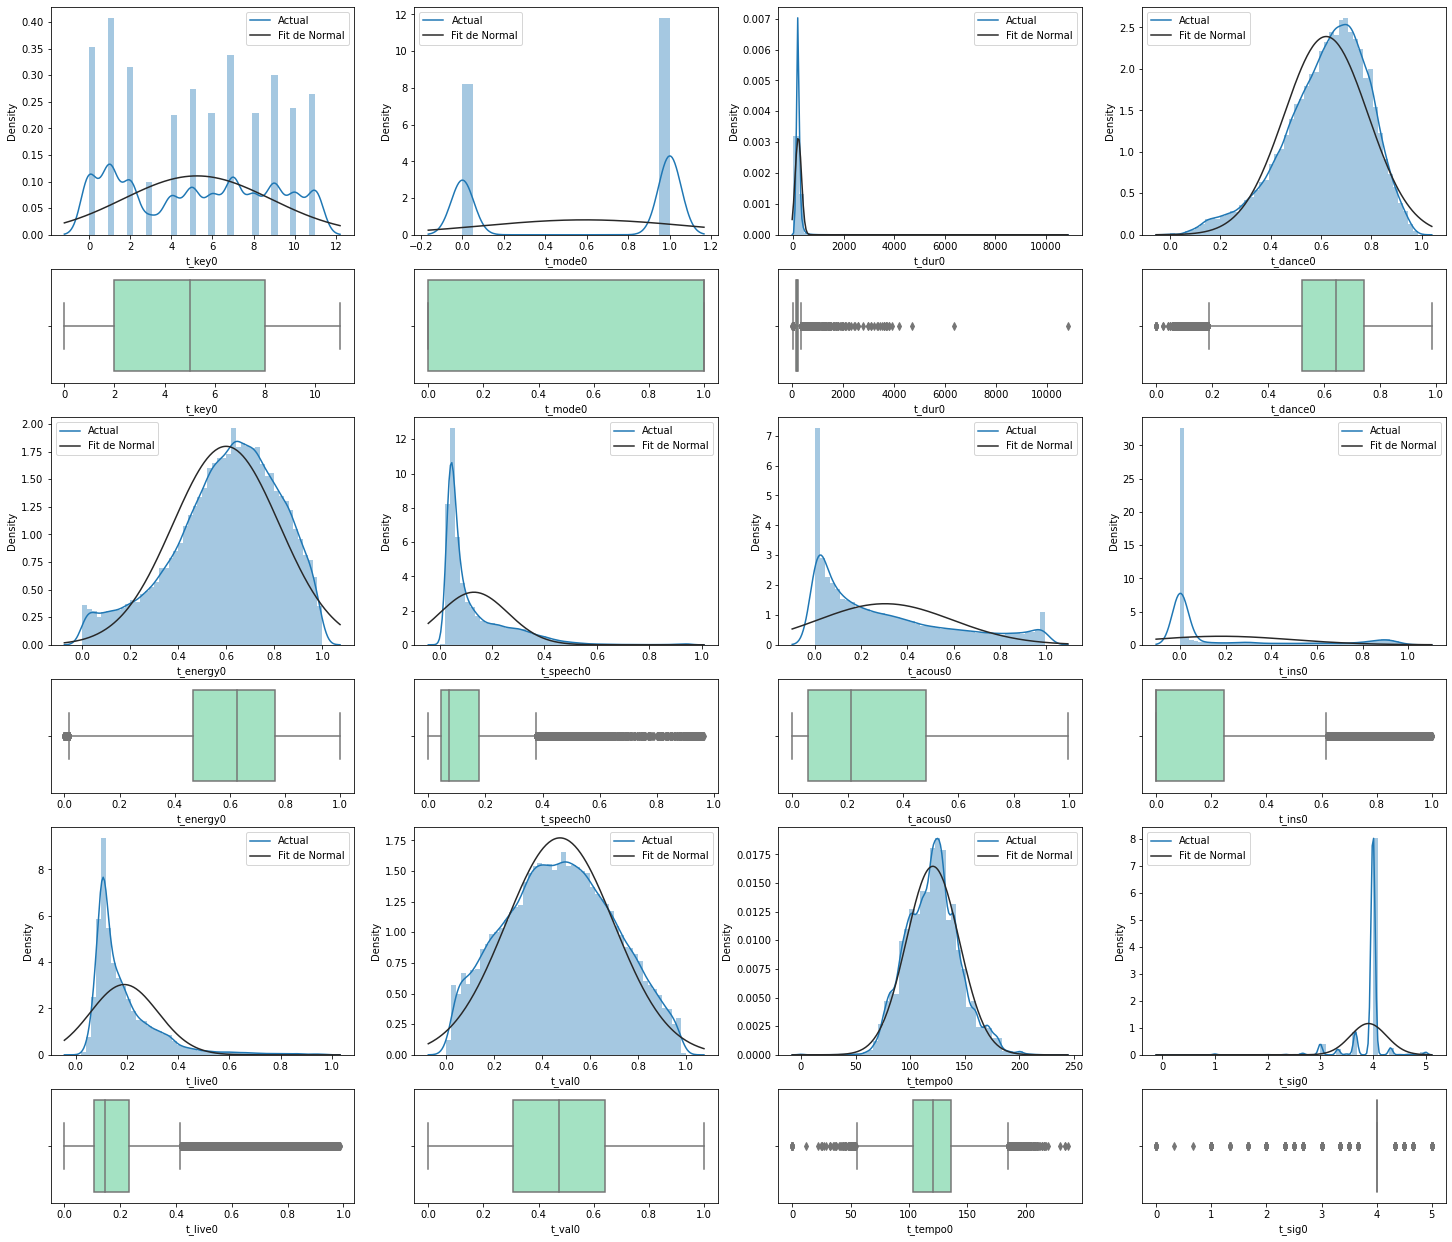

In [29]:
features = ['t_key0','t_mode0','t_dur0','t_dance0','t_energy0','t_speech0','t_acous0','t_ins0','t_live0','t_val0','t_tempo0','t_sig0']
histogramas_features(features,train)

**Observaciones**

- Variable Modo: Solo toma dos valores, ya que el modo puede ser Menor (cero) o Mayor (1).

- Variable Duration: muy sesgada a la izquierda. Segun se vio mas adelante, el promedio de esta variable es de 200 segundos (3.4 minutos) y el 75% se encuentra en 230 segundos. Estos valores se ajustan a la duracion de una cancion promedio. Por otro lado, el mayor valor en esta variable es de 180 minutos. 

- Variable time Signature: Esta variable esta muy relacionada con la varible Tempo, ya que ambas hacen referencia a las BPM de la cancion. Por lo que podriamos obviar este atributo y solo usar Tempo.

- Tempo: Se ven algunos valores en Cero, lo cual es incorrecto (porque no deberian haber canciones con Cero BPM). Estos datos se deben eliminar

- Speechness, Liveliness y Instrumentalnes: muy sesgadas a la derecha. 


### Time Signature y Tempo

In [30]:
#Eliminamos Time Signature del analisis

train.drop('t_sig0',inplace=True, axis = 1)

In [31]:
#Variable Tempo, vemos cuantos valores hay en cero
train.loc[train['t_tempo0']<1].count()

t_key0              18
t_mode0             18
t_dur0              18
t_dance0            18
t_energy0           18
t_speech0           18
t_acous0            18
t_ins0              18
t_live0             18
t_val0              18
t_tempo0            18
popularity          18
ClasePopularidad    18
dtype: int64

In [32]:
#Eliminamos esos valores 

def removerCeros(value):
    if (value == 0):
        return np.nan
    else:
        return value


In [33]:
#Aplicamos la funcion 
train['t_tempo0']= train['t_tempo0'].apply(lambda x : removerCeros(x))
train.isnull().sum()

t_key0               0
t_mode0              0
t_dur0               0
t_dance0             0
t_energy0            0
t_speech0            0
t_acous0             0
t_ins0               0
t_live0              0
t_val0               0
t_tempo0            18
popularity           0
ClasePopularidad     0
dtype: int64

In [34]:
#Eliminamos los registros
train.dropna(inplace = True)

### Variable Duration

In [35]:
#Por curiosidad, buscamos el registro de la cancion de 180minutos de duracion
train.loc[train['t_dur0']>10000]

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
id,,,,,,,,,,,,,
35803,1.0,1.0,10828.19,0.657,0.635,0.04,0.0,0.0,0.111,0.496,130.0,55.0,3


In [37]:
#Con el ID vamos al Data Set original y buscamos el nombre de esta cancion
dfReducido.loc[35803]['name']

'White Noise 3 Hour Long'

In [38]:
#Vemos cuantos registros se eliminarian con un treshold de 6 minutos
train.loc[train['t_dur0']>360].count()

t_key0              2324
t_mode0             2324
t_dur0              2324
t_dance0            2324
t_energy0           2324
t_speech0           2324
t_acous0            2324
t_ins0              2324
t_live0             2324
t_val0              2324
t_tempo0            2324
popularity          2324
ClasePopularidad    2324
dtype: int64

In [39]:
#Eliminamos los registors

def removerOutlier(value,limit):
    if (value >limit):
        return np.nan
    else:
        return value

In [40]:
#Aplicamos la funcion y chequeamos que se identificaron los registros que se quieren eliminar
train['t_dur0']= train['t_dur0'].apply(lambda x : removerOutlier(x,360))
train.isnull().sum()

t_key0                 0
t_mode0                0
t_dur0              2324
t_dance0               0
t_energy0              0
t_speech0              0
t_acous0               0
t_ins0                 0
t_live0                0
t_val0                 0
t_tempo0               0
popularity             0
ClasePopularidad       0
dtype: int64

In [41]:
#Eliminamos los registros
train.dropna(inplace = True)

C:\Users\acana\miniconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='t_dur0'>

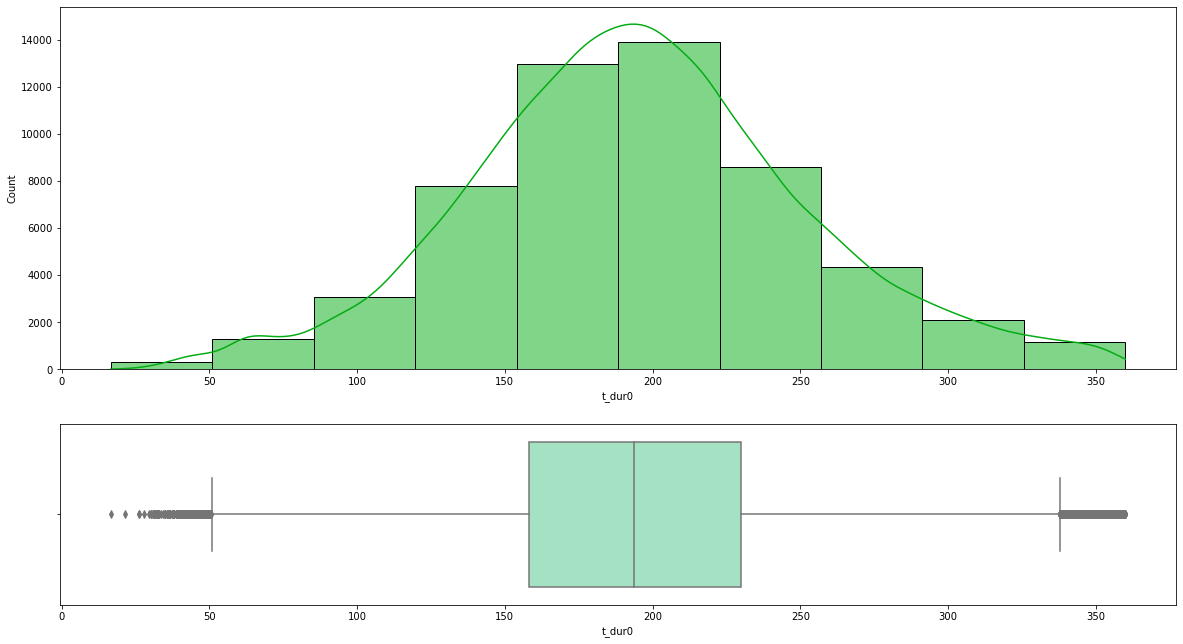

In [42]:
fig, axes = plt.subplots(2,1, figsize=(20,11), gridspec_kw={'height_ratios': [2, 1]}) 
'''Creamos una figura que genera 6 axes, donde hay una relacion 3 a 1 en el ancho de cada par de graficos 
Nota: se podria hacer algo similar a lo largo usando gridspec_kw={'height_ratios':[3,1]'''

sns.histplot(x = 't_dur0',data = train, color ='#03ac13', bins = 10, ax = axes[0], kde = True)
sns.boxplot(x = 't_dur0', data = train, orient = 'v', color = '#99edc3', ax = axes[1])

### Test de Hipotesis para verificar normalidad

Posibles test a utilizar:

- Shapiro-Wilk Test: Evalua la data y cuantifica la probabilidad de que esa data haya sido tomada de una distribucion de Gauss. En la practica, este metodo funciona muy bien para data set chicos (al rededor de 1000 registros o menos)

- D'Agostino Test: Calcula datos estadisticos de la data para determinar si la distribucion se acerca a la normal. 

- Anderson-Darling Test: Es un test estadistco que evalua si un data set viene de una distribucion en particular, se pueden testear muchas. A diferencia de el test de D'Agostino, no solo utiliza el p-valor sino una lista mas completa de valores estadisticos



De las variables que se manejan en el analisis, se tienen dos que son que toman valores discretos: Key y Mode. Como se dijo antes, Mode es Bimodal, nunca se va a poder ajustar a una distribucion normal, por lo que **NO** transformaremos dicha variable

In [43]:
from scipy.stats import normaltest

#Vamos a realizar el test a TODOS los atributos en nuestro Train data set

'''D'Agostino test'''

features = ['t_key0','t_dur0','t_dance0','t_energy0','t_speech0','t_acous0','t_ins0','t_live0','t_val0','t_tempo0']

for col in features:
  stat, p = normaltest(train[col])

  p_value = 0.05
  if p > p_value:
    print(f'Sample looks Gaussian for {col}, with p_value = {p}')
  else:
    print(f'Sample does not look Gaussian for {col}, with p_value = {p}')



Sample does not look Gaussian for t_key0, with p_value = 0.0
Sample does not look Gaussian for t_dur0, with p_value = 1.113083050037469e-56
Sample does not look Gaussian for t_dance0, with p_value = 0.0
Sample does not look Gaussian for t_energy0, with p_value = 0.0
Sample does not look Gaussian for t_speech0, with p_value = 0.0
Sample does not look Gaussian for t_acous0, with p_value = 0.0
Sample does not look Gaussian for t_ins0, with p_value = 0.0
Sample does not look Gaussian for t_live0, with p_value = 0.0
Sample does not look Gaussian for t_val0, with p_value = 0.0
Sample does not look Gaussian for t_tempo0, with p_value = 6.930115741447034e-118


In [44]:
from scipy.stats import anderson

'''Anderson Darling Test'''

for col in features:
  result = anderson(train[col])
  print(result)
  p = 0
  for i in range(len(result.critical_values)):
    sl = result.significance_level[i]
    cv = result.critical_values[i]
    if result.statistic < result.critical_values[i]:
      print(f'For {col}, level: {sl} y value: {cv} = data looks normal (fail to reject H0)')
    else:
      print(f'For {col}, level: {sl} y value: {cv} = data does not look normal (reject H0')


AndersonResult(statistic=1237.3408911112929, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
For t_key0, level: 15.0 y value: 0.576 = data does not look normal (reject H0
For t_key0, level: 10.0 y value: 0.656 = data does not look normal (reject H0
For t_key0, level: 5.0 y value: 0.787 = data does not look normal (reject H0
For t_key0, level: 2.5 y value: 0.918 = data does not look normal (reject H0
For t_key0, level: 1.0 y value: 1.092 = data does not look normal (reject H0
AndersonResult(statistic=65.49616693743883, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
For t_dur0, level: 15.0 y value: 0.576 = data does not look normal (reject H0
For t_dur0, level: 10.0 y value: 0.656 = data does not look normal (reject H0
For t_dur0, level: 5.0 y value: 0.787 = data does not look normal (reject H0
For t_dur0, level: 2.5 y value: 0.918 = data does not l

**Observaciones**

Los resultados de ambos test muestran que los atributos **NO** tienen distribucion Gaussiana.
Por lo tanto, se realiza una transformacion con Box Cox.

Para poder aplicar este metodo, los valores deben ser positivos y distintos a cero. Excepto Duration y Tempo, todos los atributos tienen valores de Cero:

- Key: el valor 0 representa la Key C (Do).
- Mode: el valor 0 representa el modo Menor
- Dance, Energy, Speech, Acustivness, Instrumentalness, Liveliness y Valence: Toman valores de entre 0 a 1.


Por lo tanto, previo a correr Box Cox, se desplazaran los datos sumando +1 a todos los registros

In [45]:
'''Desplazamos los atributos que presentan valores cero'''

atributos_norm = ['t_key0','t_dance0','t_energy0','t_speech0','t_acous0','t_ins0','t_live0','t_val0']

for col in atributos_norm:
  train[col]= train[col].apply(lambda x : x+1)

In [46]:
train.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
id,,,,,,,,,,,,,
146790,4.0,0.0,254.00,1.521,1.395,1.0340,1.6580,1.003,1.1550,1.193,99.134,34.0,2
142735,8.0,0.0,256.57,1.859,1.536,1.1030,1.0241,1.000,1.0667,1.713,80.997,2.0,1
971,8.0,1.0,192.34,1.564,1.217,1.0310,1.9090,1.002,1.1090,1.467,119.123,62.0,4
61341,7.0,1.0,126.84,1.745,1.618,1.2870,1.1780,1.000,1.2900,1.519,129.052,19.0,1
153359,7.0,1.0,156.23,1.759,1.411,1.0427,1.4160,1.706,1.1320,1.281,145.928,43.0,3


In [47]:
from scipy import stats

'''Normalizamos los atributos seleccionados'''


features_norm = ['t_key0','t_dur0','t_dance0','t_energy0','t_speech0','t_acous0','t_ins0','t_live0','t_val0','t_tempo0']
trainNorm = train.drop(['popularity','ClasePopularidad'],axis = 1)
L = []

for col in features_norm:
  norm,l = stats.boxcox(train[col])
  trainNorm[col] = norm
  L.append(l)
  print(f'{col} hecha')


t_key0 hecha
t_dur0 hecha
t_dance0 hecha
t_energy0 hecha
t_speech0 hecha
t_acous0 hecha
t_ins0 hecha
t_live0 hecha
t_val0 hecha
t_tempo0 hecha


C:\Users\acana\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\acana\miniconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\acana\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\acana\miniconda3\lib\site-packages\seaborn\_core.py:1326: UserWarni

C:\Users\acana\miniconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\acana\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\acana\miniconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\acana\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with sim

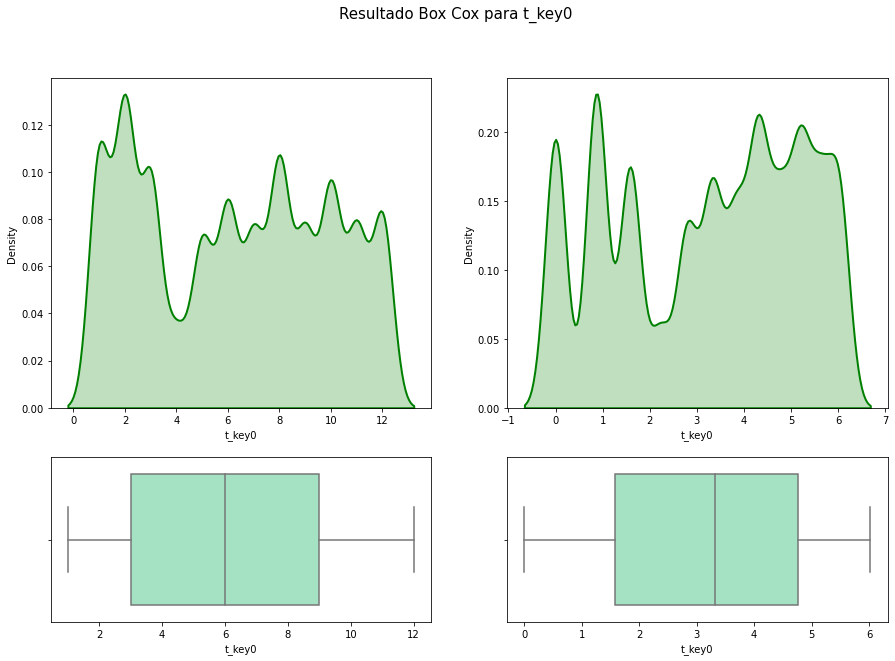

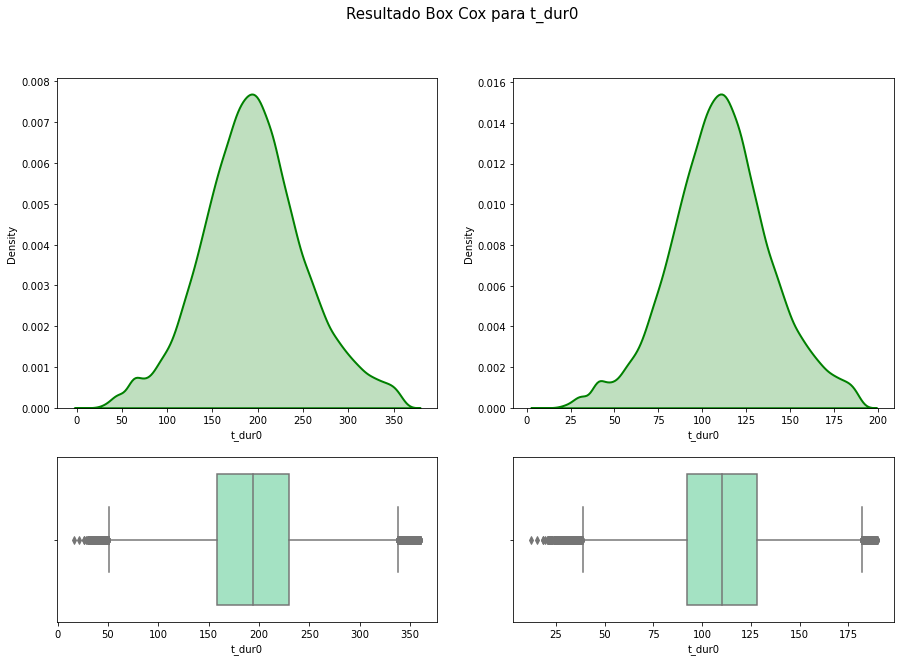

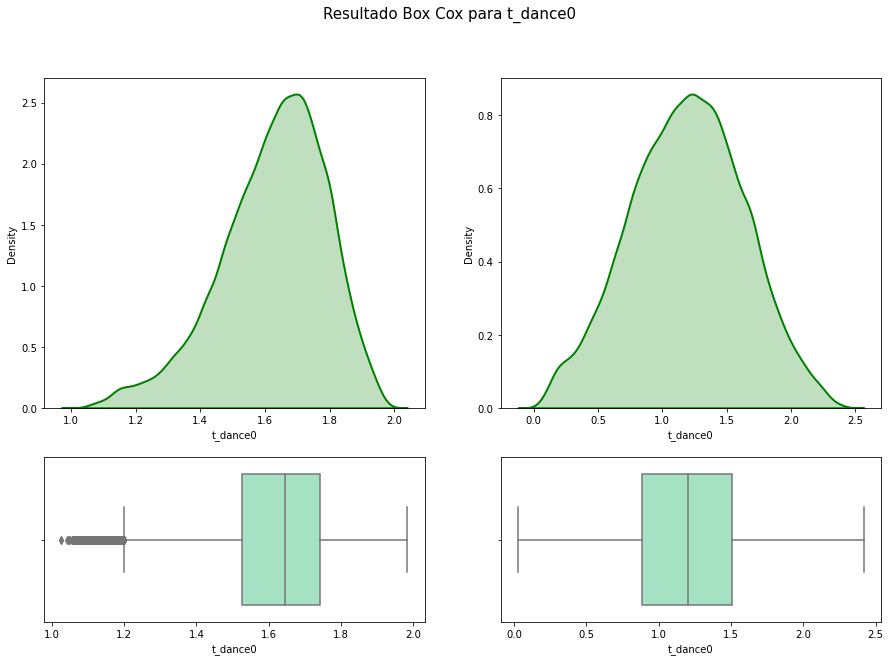

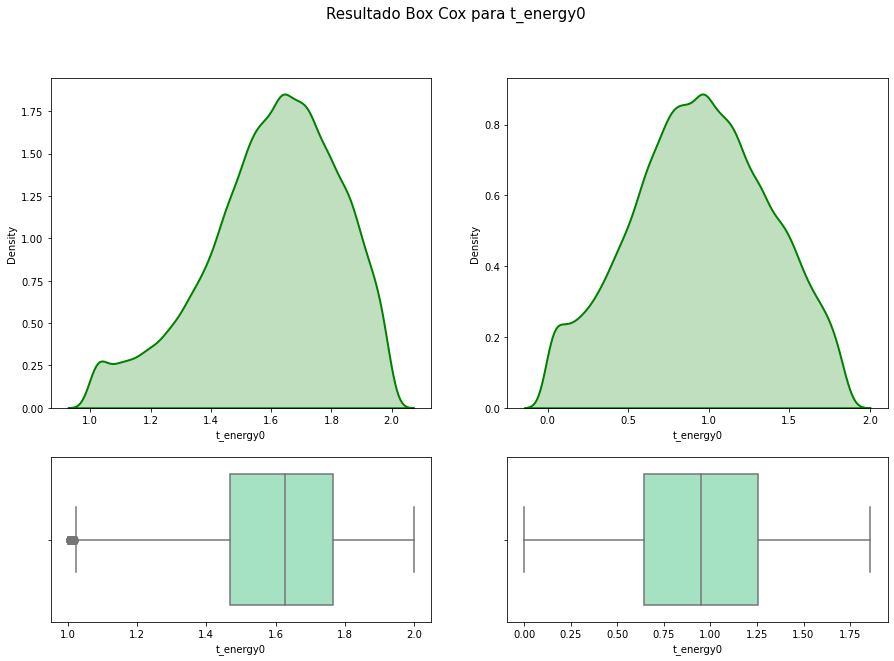

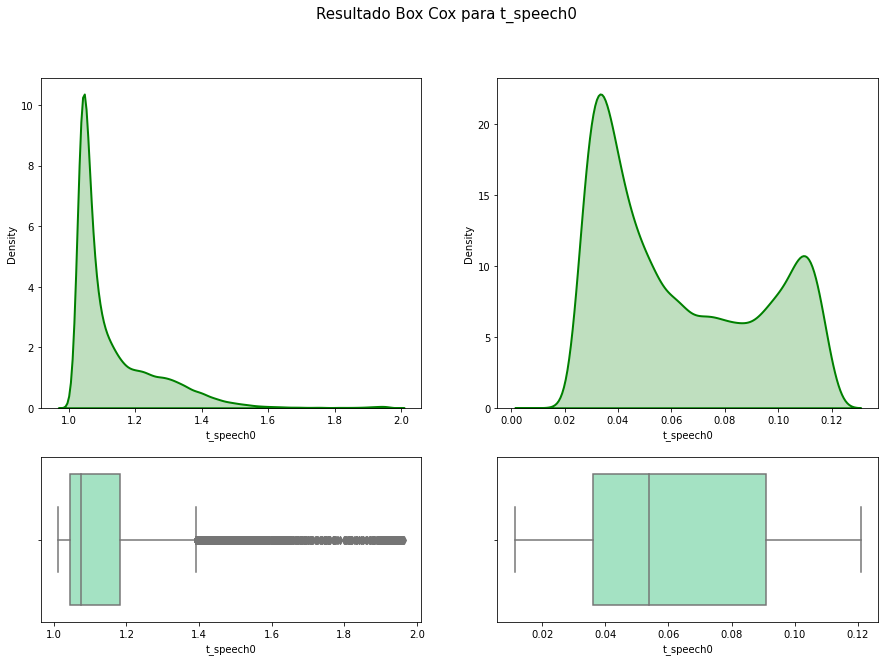

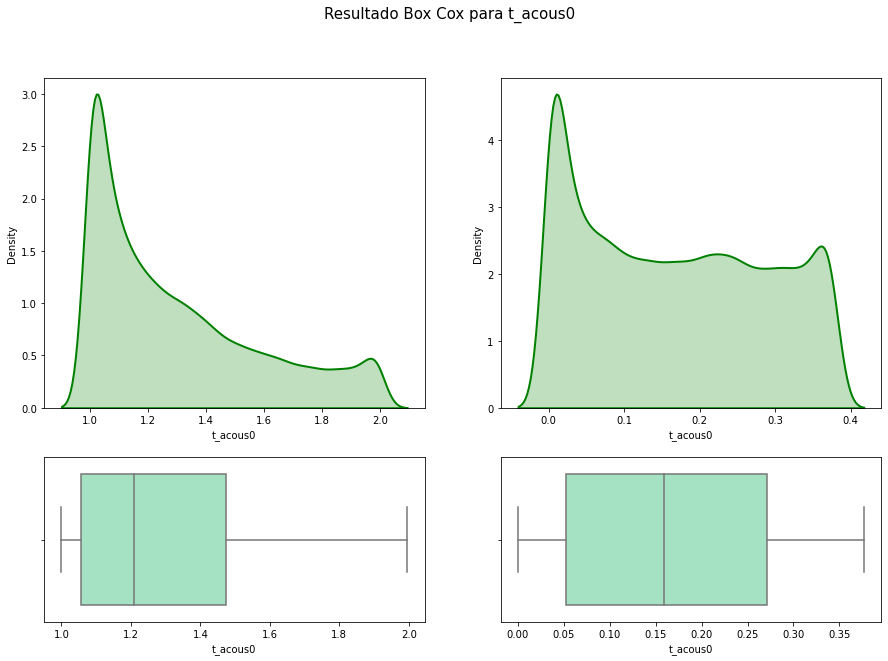

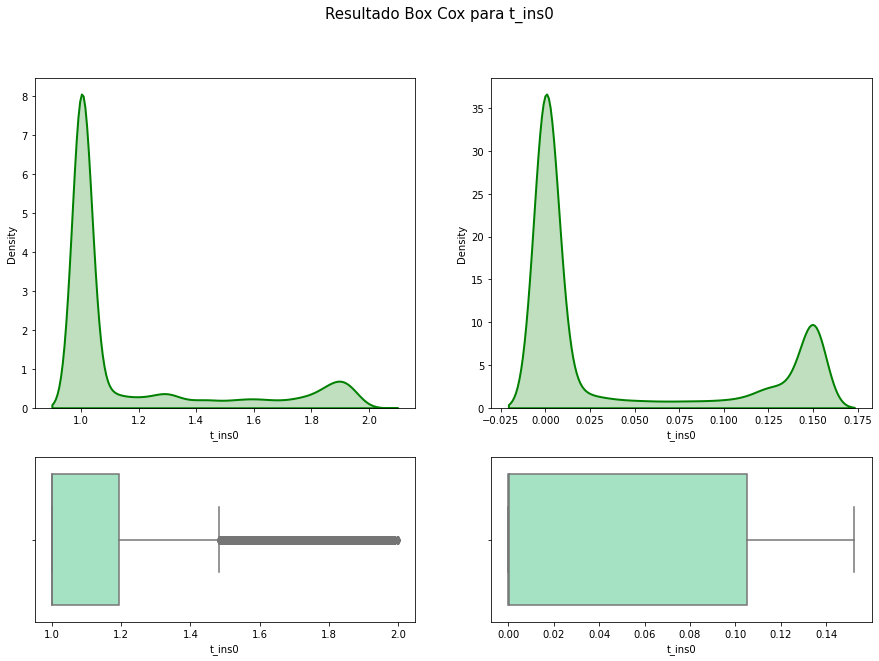

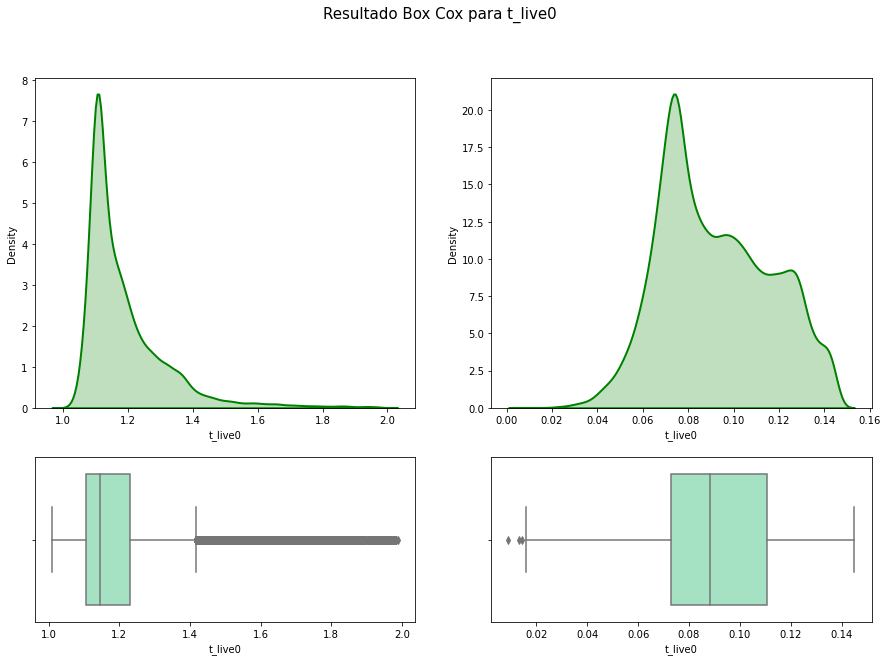

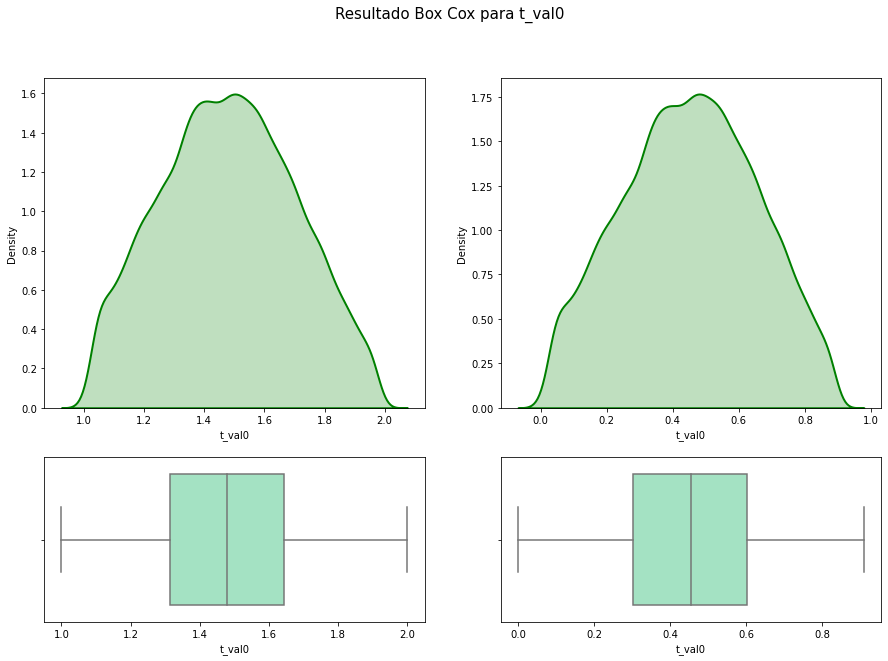

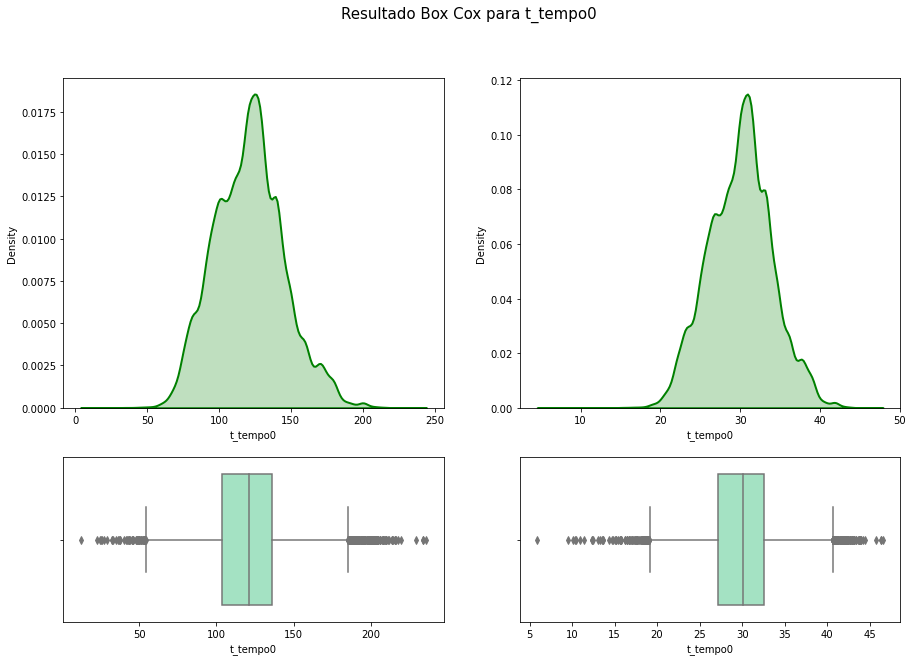

In [48]:
for col in features_norm:
  fig, ax = plt.subplots(2, 2, gridspec_kw={'height_ratios': [2,1]},figsize=(15,10))
  sns.distplot(train[col], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0,0])
  sns.boxplot(x = col, data = train, orient = 'v', color = '#99edc3', ax = ax[1,0])

 
  sns.distplot(trainNorm[col], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[0,1])
  sns.boxplot(x = col, data = trainNorm, orient = 'v', color = '#99edc3', ax = ax[1,1])
  fig.suptitle(f'Resultado Box Cox para {col}', fontsize=15)

**Observaciones**
Podemos ver en los BoxPlots que muchas variables quedaron mas centradas y se logro reducir la cantidad de outliers con la transformacion

In [49]:
#Agregamos el atributo Mode (que no se normalizo) y las dos variables target
trainNorm['popularity'] = train['popularity']
trainNorm['ClasePopularidad'] = train['ClasePopularidad']

In [50]:
trainNorm.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
id,,,,,,,,,,,,,
146790,2.217079,0.0,139.731754,0.869118,0.519249,0.029225,0.319573,0.002967,0.091678,0.188732,26.457350,34.0,2
142735,4.304625,0.0,140.968235,1.910310,0.769341,0.067253,0.023262,0.000000,0.052209,0.663667,23.141670,2.0,1
971,4.304625,1.0,109.520199,0.977668,0.253525,0.026992,0.364818,0.001985,0.074177,0.444230,29.855429,62.0,4
61341,3.828397,1.0,75.954996,1.509001,0.931646,0.106186,0.139922,0.000000,0.120665,0.491329,31.462427,19.0,1
153359,3.828397,1.0,91.244236,1.555391,0.545826,0.035371,0.251469,0.149262,0.083623,0.272233,34.090480,43.0,3


In [51]:
#Guardamos el data set obtenido, que sera el Train Set para entrenamiento de Algoritmos

#Correr esta celda solo si no se tiene el archivo guardado previamente

trainNorm.to_csv('trainset.csv')

## Pipeline - Etapa 2

1) Rellenar nulos con funcion `fill_na` (tomando como referencia el train set original)

2) Transformar atributo Duration a segundos

3) Eliminar atributo Time Signature (t_sig0)

4) Eliminar registros con Tempo (t_tempo0) igual a 0, usando funcion `removeCeros`

5) Eliminar registros con Duration > 360 segundos, usando funcion `removeOutliers`

6) Normalizacion de atributos seleccionados

## Transformacion de Test Set

In [52]:
test.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,t_sig0,popularity,ClasePopularidad
id,,,,,,,,,,,,,,
116295,6.0,1.0,172833.0,0.618,0.471,0.0480,0.4000,0.000004,0.0826,0.326,81.000,4.0,56.0,3
101223,2.0,1.0,294338.0,0.754,0.812,0.1840,0.0010,0.620000,0.1220,0.245,173.033,4.0,22.0,2
47928,7.0,1.0,194946.0,0.764,0.863,0.0720,0.0321,0.005680,0.1000,0.846,122.995,4.0,22.0,2
88722,6.0,1.0,162741.0,0.670,0.898,0.0645,0.1970,0.000000,0.0406,0.948,173.896,4.0,50.0,3
111363,7.0,0.0,173913.0,0.826,0.663,0.0448,0.0154,0.000002,0.1480,0.919,113.988,4.0,35.0,2


In [53]:
test.shape

(14472, 14)

In [54]:
# 1) fill_na

atributos = ['t_key0','t_mode0','t_dance0','t_energy0','t_speech0','t_acous0','t_ins0','t_live0','t_val0','t_tempo0','t_sig0']

fill_na(train_ref,test,atributos)
#Verificacion
train.isnull().sum()

t_key0              0
t_mode0             0
t_dur0              0
t_dance0            0
t_energy0           0
t_speech0           0
t_acous0            0
t_ins0              0
t_live0             0
t_val0              0
t_tempo0            0
popularity          0
ClasePopularidad    0
dtype: int64

In [55]:
# 2) pasar Duration a segundos
test['t_dur0'] = test['t_dur0'].apply(lambda x: round(x/1000,2))

In [56]:
# 3) Eliminar Time Signature (t_sig0) 
test.drop('t_sig0',inplace=True, axis = 1)

In [57]:
# 4) Eliminar registros con Tempo = 0
test['t_tempo0']= test['t_tempo0'].apply(lambda x : removerCeros(x))
test.isnull().sum()

t_key0              0
t_mode0             0
t_dur0              0
t_dance0            0
t_energy0           0
t_speech0           0
t_acous0            0
t_ins0              0
t_live0             0
t_val0              0
t_tempo0            9
popularity          0
ClasePopularidad    0
dtype: int64

In [58]:
test.dropna(inplace = True)

In [59]:
test.loc[test['t_dur0']>360].count()

t_key0              543
t_mode0             543
t_dur0              543
t_dance0            543
t_energy0           543
t_speech0           543
t_acous0            543
t_ins0              543
t_live0             543
t_val0              543
t_tempo0            543
popularity          543
ClasePopularidad    543
dtype: int64

In [60]:
# 5) Eliminar registros con Duration > 360 segundos
test['t_dur0']= test['t_dur0'].apply(lambda x : removerOutlier(x,360))
test.isnull().sum()

t_key0                0
t_mode0               0
t_dur0              543
t_dance0              0
t_energy0             0
t_speech0             0
t_acous0              0
t_ins0                0
t_live0               0
t_val0                0
t_tempo0              0
popularity            0
ClasePopularidad      0
dtype: int64

In [61]:
test.dropna(inplace = True)

In [62]:
# 6) Normalizacion de atributos seleccionados

'''Desplazamos los atributos que presentan valores cero'''

atributos_norm = ['t_key0','t_dance0','t_energy0','t_speech0','t_acous0','t_ins0','t_live0','t_val0']

for col in atributos_norm:
  test[col]= test[col].apply(lambda x : x+1)

'''Normalizamos los atributos seleccionados'''


features_norm = ['t_key0','t_dur0','t_dance0','t_energy0','t_speech0','t_acous0','t_ins0','t_live0','t_val0','t_tempo0']
testNorm = test.drop(['popularity','ClasePopularidad'],axis = 1)
L = []

for col in features_norm:
  norm,l = stats.boxcox(test[col])
  testNorm[col] = norm
  L.append(l)
  print(f'{col} hecha')


t_key0 hecha
t_dur0 hecha
t_dance0 hecha
t_energy0 hecha
t_speech0 hecha
t_acous0 hecha
t_ins0 hecha
t_live0 hecha
t_val0 hecha
t_tempo0 hecha


In [63]:
#Agregamos el atributo Mode (que no se normalizo) y las dos variables target
testNorm['popularity'] = test['popularity']
testNorm['ClasePopularidad'] = test['ClasePopularidad']

In [64]:
testNorm.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
id,,,,,,,,,,,,,
116295,3.873489,1.0,102.077434,1.136005,0.652068,0.038806,0.245297,0.000004,0.061371,0.313870,20.325737,56.0,3
101223,1.595405,1.0,163.222452,1.559666,1.375892,0.090603,0.000999,0.144474,0.079899,0.237952,32.519312,22.0,2
47928,4.359420,1.0,113.531853,1.593801,1.504156,0.052763,0.030623,0.005559,0.070192,0.776168,26.369467,22.0,2
88722,3.873489,1.0,96.792061,1.289259,1.595320,0.048714,0.151174,0.000000,0.034878,0.862629,32.618254,50.0,3
111363,4.359420,0.0,102.640817,1.814995,1.031562,0.036711,0.015053,0.000002,0.089617,0.838169,25.157347,35.0,2


In [65]:
testNorm.shape

(13920, 13)

In [66]:
#Guardamos el data set obtenido, que sera el Train Set para entrenamiento de Algoritmos

#Correr esta celda solo si no se tiene el archivo guardado previamente

testNorm.to_csv('testset.csv')

**Con esto se termina la manipulacion y limpieza de datos.**

Se obtuvieron varios archivos:

- clean_data: Archivo para utilizar en las visualizaciones y analisis en profundidad de la data
- trainset: Set para entrenamiento de algoritmos, con todas las transformaciones realizadas
- testset: Set para el fit de algoritmos, con todas las transformaciones realizadas